In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

import librosa
import librosa.display

In [ ]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'librosa_test_on_jn.ipynb'])

In [2]:
file_path = "../data/songData/genres/blues/blues.00000.wav"
y, sr = librosa.load(file_path)

In [3]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr= sr)
print("tempo is ")
print(tempo)
print("")
print("beat frame is")
print(beat_frames)

tempo is 
123.046875

beat frame is
[  11   32   53   73   94  114  135  156  177  197  218  239  260  280  301
  322  343  363  384  405  426  446  467  488  509  529  550  570  591  612
  633  653  673  693  713  734  755  775  796  816  837  858  878  898  919
  940  960  981 1002 1022 1043 1064 1085 1105 1126 1147 1168 1188 1209 1230
 1251]


In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.logamplitude(S, ref_power=np.max)

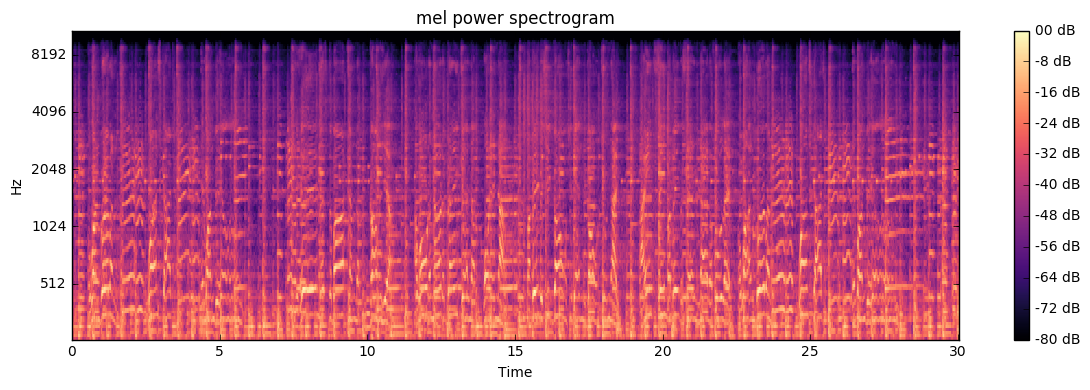

In [6]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%02.0f dB')
plt.tight_layout()

In [7]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
S_harmonic = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)



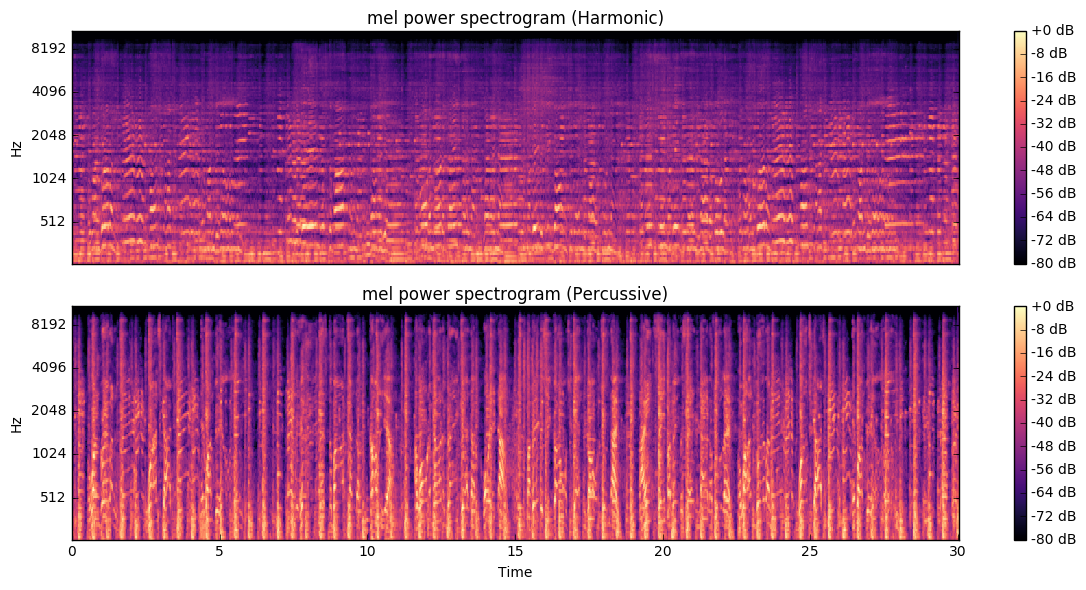

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

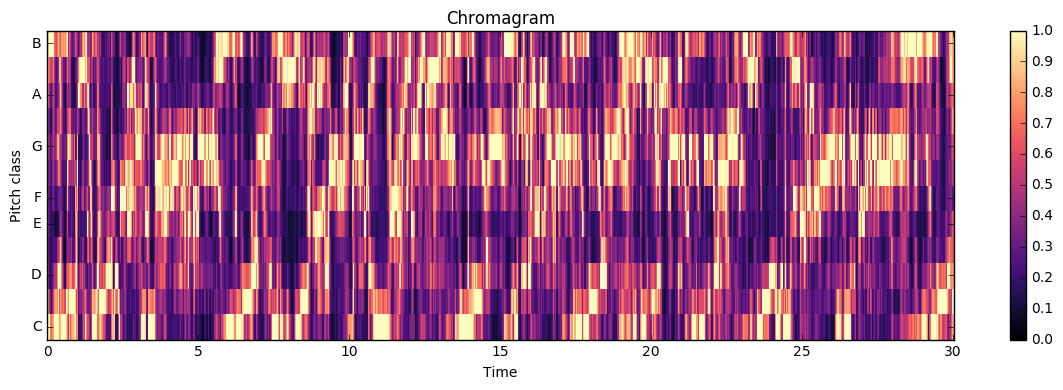

In [9]:
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

plt.figure(figsize=(12, 4))

librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

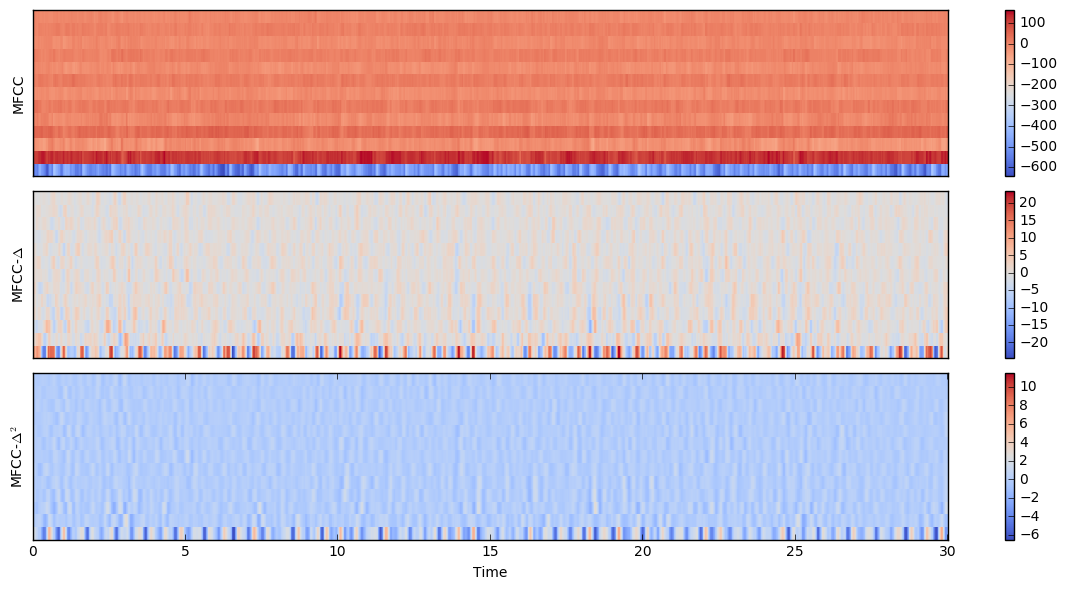

In [10]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3, 1, 3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])


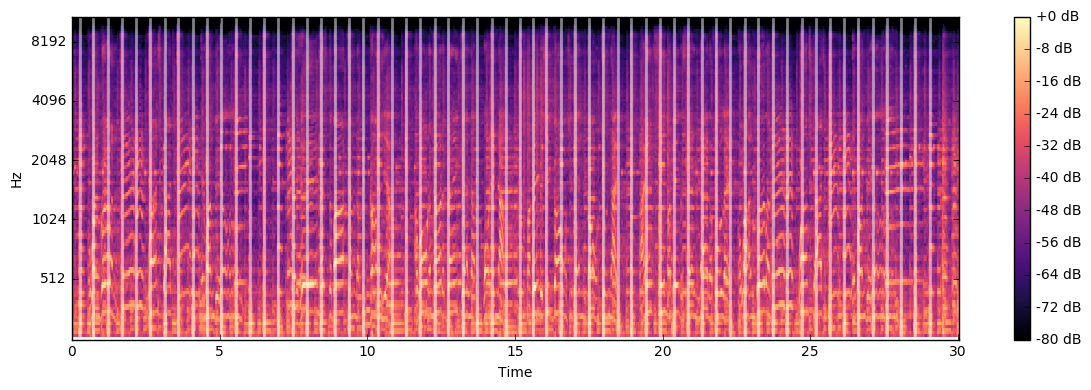

In [11]:
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.vlines(librosa.frames_to_time(beats),
          1, 0.5 * sr,
          colors='w', linestyles='-', linewidth=2, alpha=0.5)

plt.axis('tight')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [12]:
print('Estimated tempo :%.2f BPM' % tempo)
print('First 5 beat frames:', beats[:5] )
print('Frist 5 beat times:', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo :123.05 BPM
First 5 beat frames: [11 31 52 73 94]
Frist 5 beat times: [ 0.2554195   0.71981859  1.20743764  1.69505669  2.18267574]


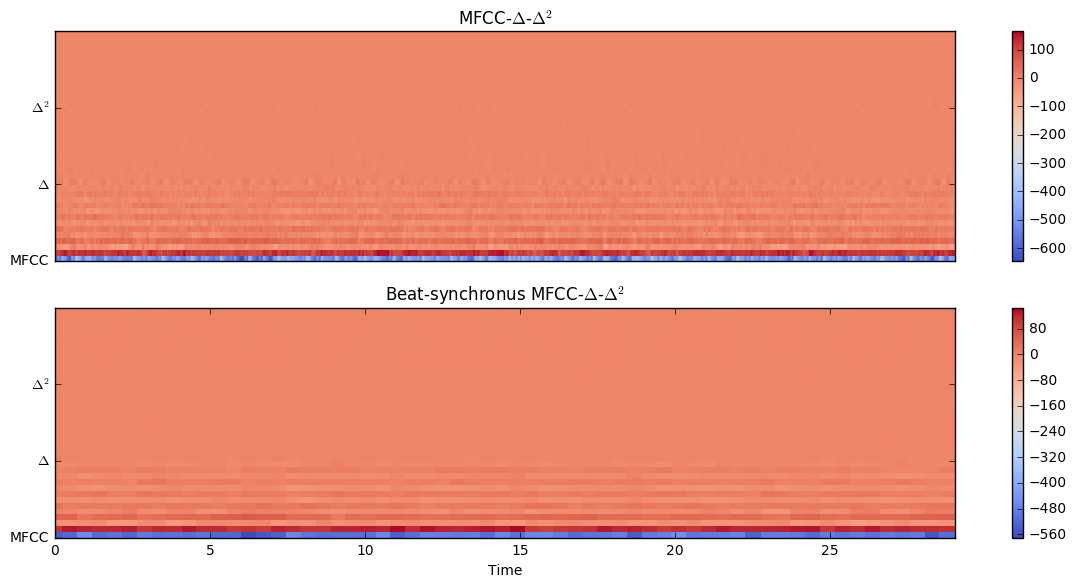

In [13]:
M_sync = librosa.util.sync(M, beats)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(M)
plt.title('MFCC-$\Delta$-$\Delta^2$')

plt.yticks(np.arange(0, M.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])

plt.colorbar()

plt.subplot(2, 1, 2)

librosa.display.specshow(M_sync, x_axis='time',
                        x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))
plt.yticks(np.arange(0, M_sync.shape[0], 13), ['MFCC', '$\Delta$', '$\Delta^2$'])
plt.title('Beat-synchronus MFCC-$\Delta$-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

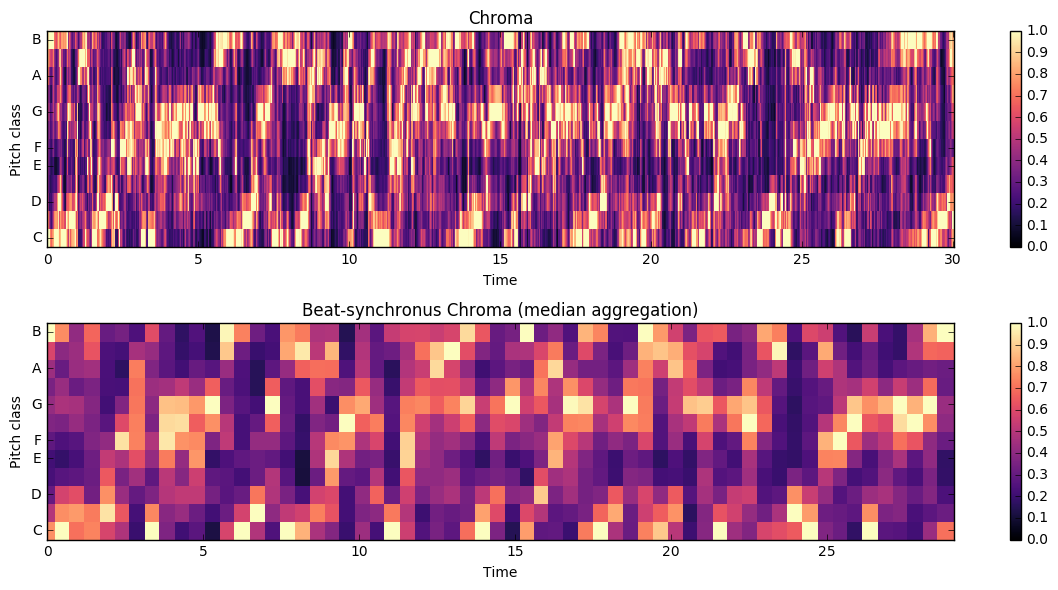

In [14]:
C_sync = librosa.util.sync(C, beats, aggregate=np.median)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(C, sr=sr, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time')
plt.title('Chroma')
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(C_sync, y_axis='chroma', vmin=0.0, vmax=1.0, x_axis='time',
                        x_coords=librosa.frames_to_time(librosa.util.fix_frames(beats)))
plt.title('Beat-synchronus Chroma (median aggregation)')
plt.colorbar()
plt.tight_layout()